In [1]:
%load_ext autoreload
%autoreload 2

import math
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import random
os.environ["SYMBOLICA_LICENSE"] = "GAMMALOOP_USER"

from mini_madnis import Integrator
from integrand import Integrand

INFO: The following paths have been automatically and temporarily added by gammaloop to your PYTHONPATH:
/home/theo/Dropbox/projects/tropic/gammaloop/python/gammaloop/dependencies/symbolica


In [2]:
def norm_numpy(x):
    return (x / x.mean()).numpy()

def trainable_parameters(net):
    return sum([p.numel() for p in net.parameters() if p.requires_grad])

N = 10000
BATCHES = 1000

In [10]:
f_sph = Integrand("spherical")
integ_sph = Integrator(f_sph, dimensions=9, lr=6e-4, loss="variance")
print("Trainable parameters:", trainable_parameters(integ_sph.flow))
# use larger batch size since the weights are quite noisy
integ_sph.train(batches=BATCHES, batch_size=2048)
w_sph = norm_numpy(f_sph(torch.rand((N, 9))))
w_sph_flow = norm_numpy(integ_sph.sample(N))

Trainable parameters: 46684
Batch 20, loss 235.9534804344177
Batch 40, loss 155.2636926651001
Batch 60, loss 114.93470293680826
Batch 80, loss 94.2481384396553
Batch 100, loss 84.38752010345459
Batch 120, loss 74.56552633047104
Batch 140, loss 68.37880153656006
Batch 160, loss 63.2435574144125
Batch 180, loss 58.07099521425035
Batch 200, loss 63.674066059589386
Batch 220, loss 62.02185930338773
Batch 240, loss 58.92651727894942
Batch 260, loss 56.20958620126431
Batch 280, loss 53.53767307741301
Batch 300, loss 52.73940614859263
Batch 320, loss 50.04886100292206
Batch 340, loss 47.515108095197114
Batch 360, loss 45.31052915520138
Batch 380, loss 43.26199179574063
Batch 400, loss 41.36165724098682
Batch 420, loss 39.68590492265565
Batch 440, loss 38.78566202873533
Batch 460, loss 38.074301740138424
Batch 480, loss 37.101710087805984
Batch 500, loss 35.923265277147294
Batch 520, loss 34.69938455063563
Batch 540, loss 33.847495015682995
Batch 560, loss 33.13365713762386
Batch 580, loss 32.

In [4]:
f_mc = Integrand("multichanneling")
integ_mc = Integrator(f_mc, dimensions=9, lr=3e-4, loss="variance")
print("Trainable parameters:", trainable_parameters(integ_mc.flow))
integ_mc.train(batches=BATCHES)
w_mc = norm_numpy(f_mc(torch.rand((N, 9))))
w_mc_flow = norm_numpy(integ_mc.sample(N))

Trainable parameters: 46684
Batch 20, loss 12.047750568389892
Batch 40, loss 7.648945990204811
Batch 60, loss 5.580761859814326
Batch 80, loss 4.459415929764509
Batch 100, loss 3.754506567120552
Batch 120, loss 3.271971058348815
Batch 140, loss 2.9403103828430175
Batch 160, loss 2.674771088734269
Batch 180, loss 2.466638000143899
Batch 200, loss 2.297616484761238
Batch 220, loss 2.1584993278438396
Batch 240, loss 2.0428286949793497
Batch 260, loss 1.9443296093207139
Batch 280, loss 1.86012831309012
Batch 300, loss 1.7864978820085526
Batch 320, loss 1.7225610030815006
Batch 340, loss 1.6660018859540715
Batch 360, loss 1.6160011753439902
Batch 380, loss 1.5711685572799883
Batch 400, loss 1.532558851391077
Batch 420, loss 1.495991732676824
Batch 440, loss 1.462700667706403
Batch 460, loss 1.4323855926161226
Batch 480, loss 1.405148380001386
Batch 500, loss 1.3800480574369431
Batch 520, loss 1.356409815297677
Batch 540, loss 1.3343401237770363
Batch 560, loss 1.314365189309631
Batch 580, l

In [5]:
f_trop = Integrand("tropical")
integ_trop = Integrator(f_trop, dimensions=23, lr=3e-4, loss="variance")
print("Trainable parameters:", trainable_parameters(integ_trop.flow))
integ_trop.train(batches=BATCHES)
w_trop = norm_numpy(f_trop(torch.rand((N, 23))))
w_trop_flow = norm_numpy(integ_trop.sample(N))

Trainable parameters: 132205
Batch 20, loss 0.547377522289753
Batch 40, loss 0.4043968118727207
Batch 60, loss 0.347928915421168
Batch 80, loss 0.3215039426460862
Batch 100, loss 0.303016414642334
Batch 120, loss 0.2902572680264711
Batch 140, loss 0.2809004870908601
Batch 160, loss 0.2743840290233493
Batch 180, loss 0.26848623322116005
Batch 200, loss 0.26338774874806403
Batch 220, loss 0.2591407722370191
Batch 240, loss 0.25566450593372186
Batch 260, loss 0.25268585435473
Batch 280, loss 0.25025517999061514
Batch 300, loss 0.24794525732596714
Batch 320, loss 0.2461014211177826
Batch 340, loss 0.24434111968559377
Batch 360, loss 0.24269294755326376
Batch 380, loss 0.2412841787855876
Batch 400, loss 0.23999484285712241
Batch 420, loss 0.23860820283492407
Batch 440, loss 0.23754166080193087
Batch 460, loss 0.23657495411841767
Batch 480, loss 0.23557555535808206
Batch 500, loss 0.2347204950749874
Batch 520, loss 0.23383710805613261
Batch 540, loss 0.23315371887551414
Batch 560, loss 0.232

std(w) / mean(w):
  spherical:           59.671
  spherical + flow:    13.174
  multichannel:        4.555
  multichannel + flow: 1.614
  tropical:            0.969
  tropical + flow:     0.337


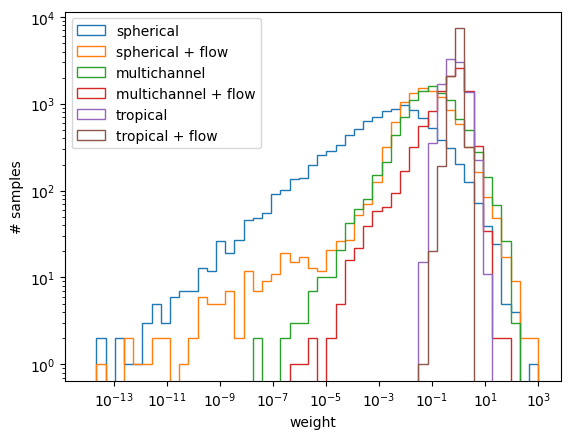

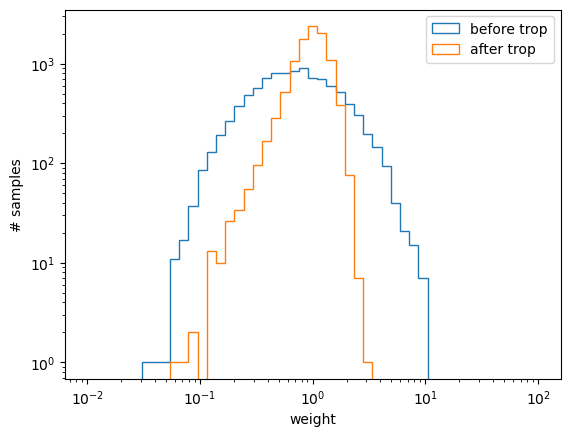

In [11]:
print("std(w) / mean(w):")
print(f"  spherical:           {np.std(w_sph):.3f}")
print(f"  spherical + flow:    {np.std(w_sph_flow):.3f}")
print(f"  multichannel:        {np.std(w_mc):.3f}")
print(f"  multichannel + flow: {np.std(w_mc_flow):.3f}")
print(f"  tropical:            {np.std(w_trop):.3f}")
print(f"  tropical + flow:     {np.std(w_trop_flow):.3f}")

bins = np.logspace(-14, 3, 50)
plt.xscale("log")
plt.yscale("log")
plt.hist(w_sph, bins, histtype="step", label="spherical")
plt.hist(w_sph_flow, bins, histtype="step", label="spherical + flow")
plt.hist(w_mc, bins, histtype="step", label="multichannel")
plt.hist(w_mc_flow, bins, histtype="step", label="multichannel + flow")
plt.hist(w_trop, bins, histtype="step", label="tropical")
plt.hist(w_trop_flow, bins, histtype="step", label="tropical + flow")
plt.xlabel("weight")
plt.ylabel("# samples")
plt.legend()
plt.show()

bins = np.logspace(-2, 2, 50)
plt.xscale("log")
plt.yscale("log")
plt.hist(w_trop, bins, histtype="step", label="before trop")
plt.hist(w_trop_flow, bins, histtype="step", label="after trop")
plt.xlabel("weight")
plt.ylabel("# samples")
plt.legend()
plt.show()

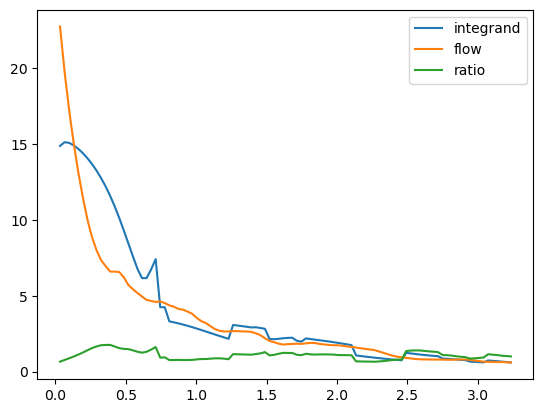

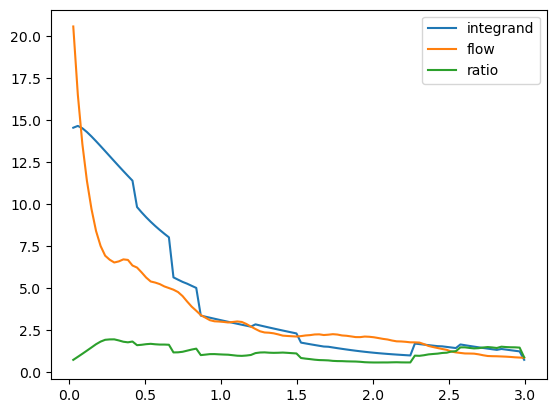

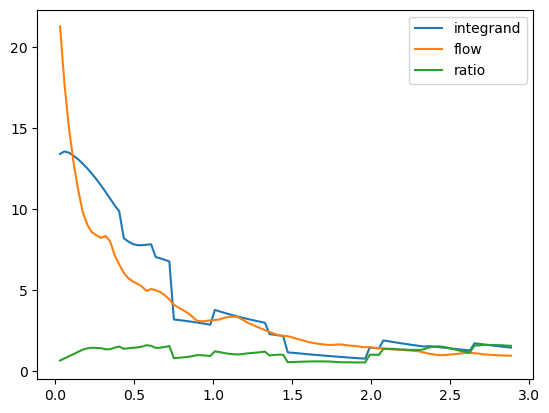

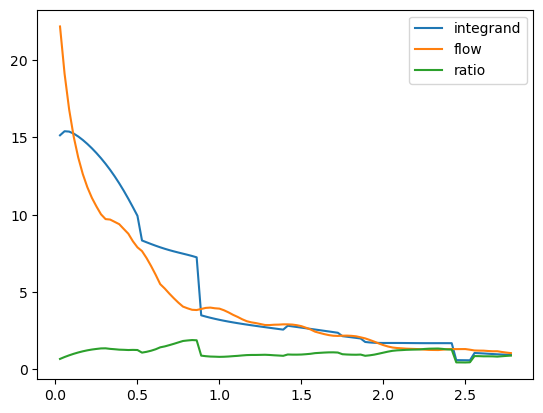

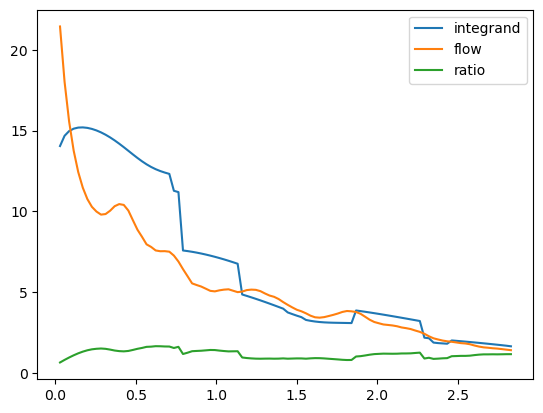

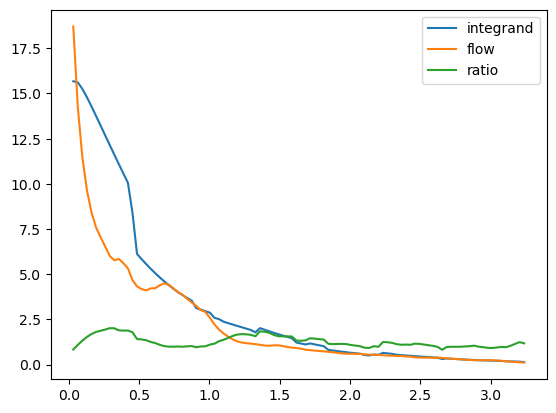

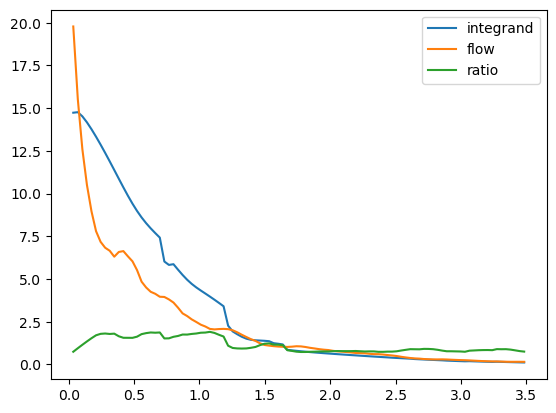

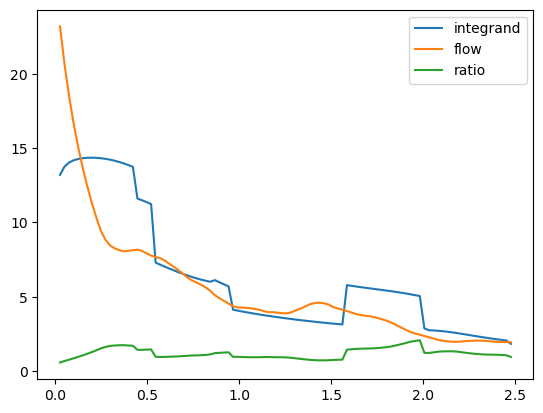

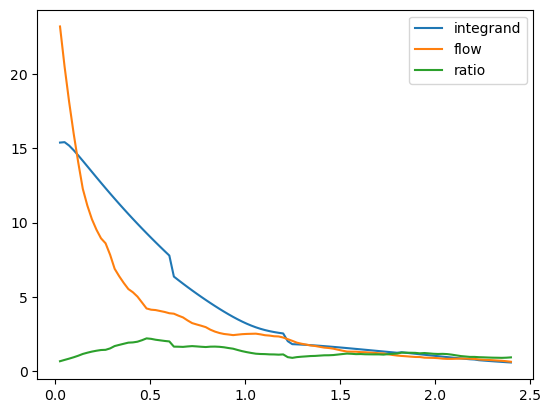

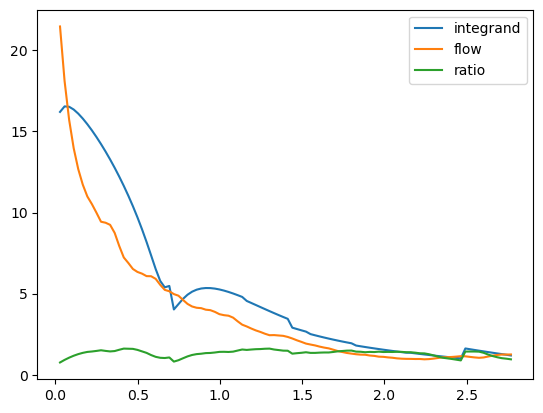

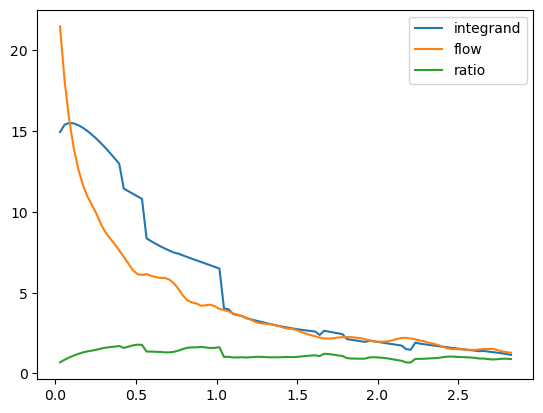

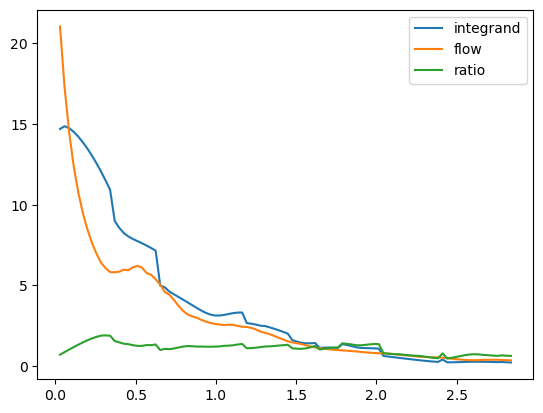

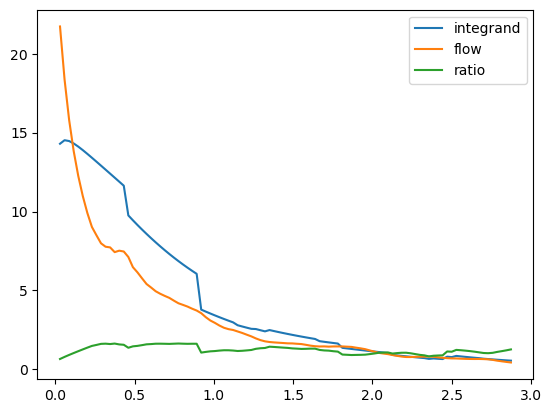

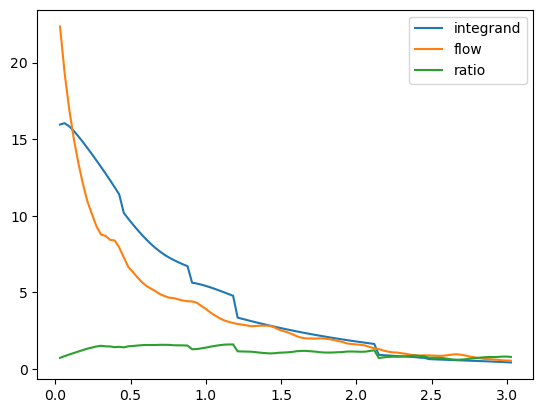

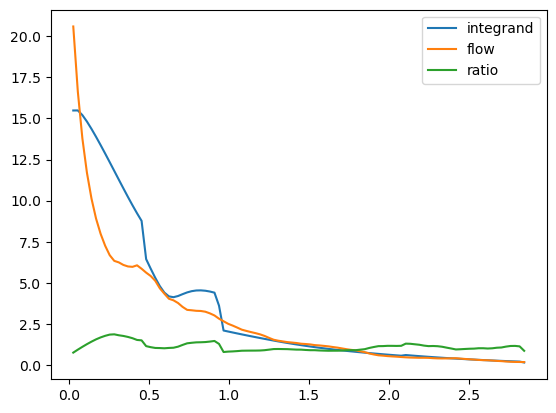

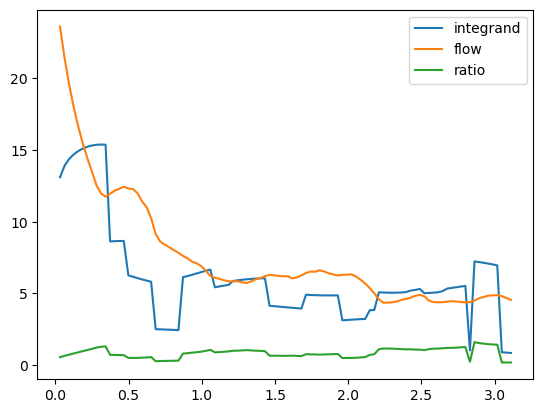

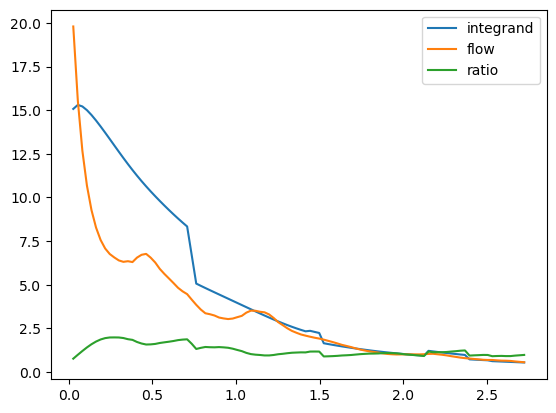

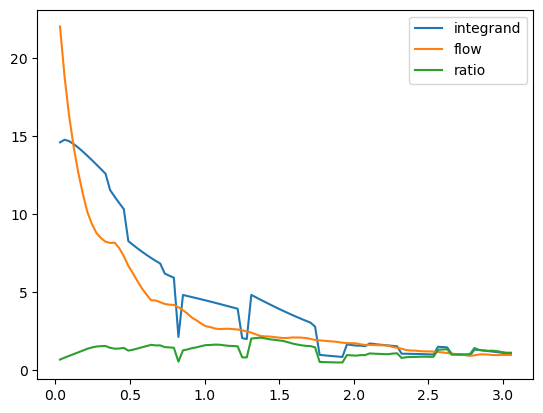

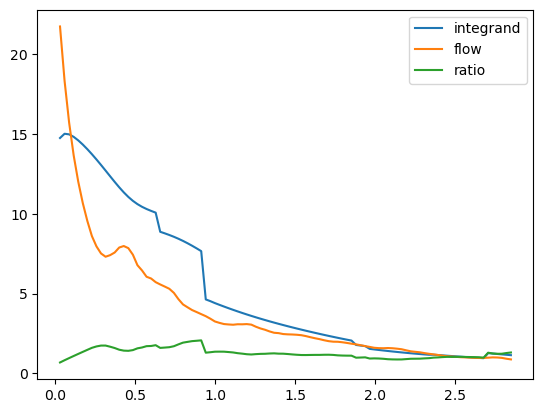

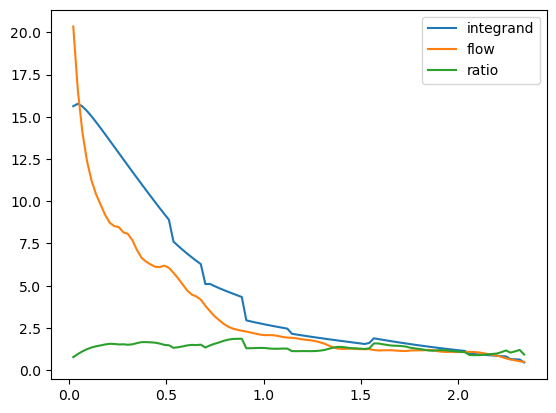

In [7]:
norm = integ_trop.sample(N).mean().item()

for seed in range(20):
    k = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.11, 0.21, 0.31,
         0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 0.12, 0.22, 0.32, 0.42, 0.52]
    
    random.seed(seed)
    k = [random.random() for _ in range(len(k))]                                                     
    k = np.array(k)
    k /= np.linalg.norm(k)                                                                               
    
    # Step 3: Determine t_max                                                                            
    # t_max is determined by the smallest positive component of k
    t_max = min(1 / k[k > 0])
    
    # Step 4: Generate M+1 equidistant points between 0 and t_max, then remove t=0
    n_points = 100  # Number of points
    # Exclude the first point (which is 0)
    t = np.linspace(0, t_max, n_points + 1)[1:]
    r = torch.tensor(t[:,None] * k[None, :], dtype=torch.float32)
    
    y_integ = f_trop(r).numpy()
    with torch.no_grad():
        y_flow = integ_trop.flow.log_prob(r).exp().numpy()
    
    plt.plot(t, y_integ / norm, label="integrand")
    plt.plot(t, y_flow, label="flow")
    plt.plot(t, y_integ / norm / y_flow, label="ratio")
    plt.legend()
    plt.show()